In [1]:
!pip install deepface opencv-python
import os
from PIL import Image
from deepface import DeepFace
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Create folder to store registered faces
os.makedirs("user_faces", exist_ok=True)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=acbbc22d0dc0246d2aecf0605151be6c94aefcd52e3d50de7a0ce860c1ae8c48
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
25-07-15 06:52:32 - Directory /root/.deepface has been created
25-07-15 06:52:32 - Directory /root/.deepface/weights has been created


In [9]:
def capture_photo(filename="captured.jpg"):
    js = Javascript('''
    async function takePhoto() {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = '📸 Capture Photo';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({ video: true });

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);

        stream.getTracks().forEach(track => track.stop());
        div.remove();

        return canvas.toDataURL('image/jpeg');
    }
    ''')

    display(js)
    data = eval_js("takePhoto()")

    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


<IPython.core.display.Javascript object>

Enter your name to register: raman
✅ Face registered as raman


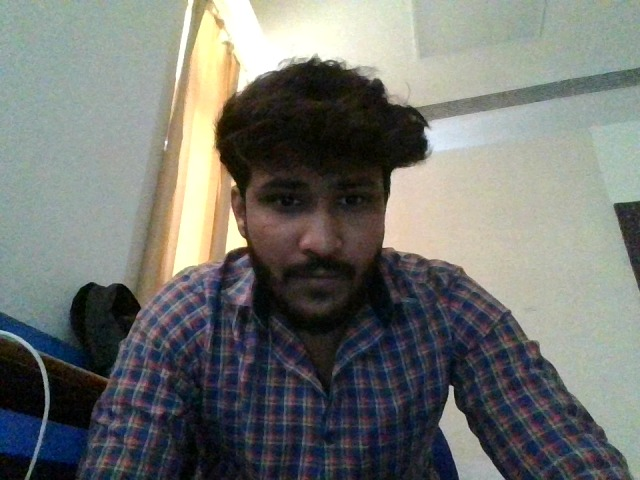

In [14]:
filename = capture_photo("register.jpg")
name = input("Enter your name to register: ")
os.rename("register.jpg", f"user_faces/{name}.jpg")
print(f"✅ Face registered as {name}")
display(Image.open(f"user_faces/{name}.jpg"))


In [15]:
filename = capture_photo("login.jpg")
matched = False

for reg_user in os.listdir("user_faces"):
    result = DeepFace.verify(
        img1_path="login.jpg",
        img2_path=os.path.join("user_faces", reg_user),
        enforce_detection=False,
        model_name='Facenet',  # Fast + accurate
        detector_backend='opencv'  # Light detector
    )

    if result["verified"]:
        print(f"✅ Login successful! Welcome, {os.path.splitext(reg_user)[0]} 🎉")
        display(Image.open("login.jpg"))
        matched = True
        break

if not matched:
    print("❌ Face not recognized. Access denied.")


<IPython.core.display.Javascript object>

❌ Face not recognized. Access denied.
